# ***Travail Pratique : Création d’un Modèle de Régression en Deep Learning avec Keras***

### ***Objectif***

Créer un modèle de régression en deep learning en utilisant TensorFlow/Keras, de l'importation des données jusqu'à l'évaluation du modèle.

***1. Installation des bibliothèques nécessaires :***
pip install numpy pandas matplotlib seaborn tensorflow scikit-learn

***Etape 1: Importation des bibliothèques en Python*** : 

In [17]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import layers  
### from tensorflow.keras.datasets import boston_housing


## ***from sklearn.model_selection import train_test_split***

La fonction ***train_test_split*** de Scikit-Learn est utilisée pour diviser un dataset en ensembles d'entraînement et de test.

## ***from sklearn.preprocessing import StandardScaler***  

***StandardScaler*** est une classe de sklearn.preprocessing utilisée pour normaliser les données en appliquant une mise à l’échelle standard (standardization).

StandardScaler transforme les données pour qu'elles aient une moyenne de 0 et un écart-type de 1 (distribution normale centrée réduite).

## ***import tensorflow as tf***

***Qu'est-ce que TensorFlow ?***

📌 TensorFlow est une bibliothèque open-source développée par Google pour le machine learning et le deep learning.

📌 Elle permet de créer, entraîner et déployer des modèles d'intelligence artificielle, notamment des ***réseaux de neurones profonds (Deep Learning)***.

In [18]:
## Vérifier l’installation de TensorFlow
import tensorflow as tf
print(tf.__version__) 

2.18.0


# ***from tensorflow import keras***

***Qu'est-ce que keras ?***

📌 Keras est une API haut niveau intégrée à TensorFlow, utilisée pour construire et entraîner des modèles de deep learning de manière simple et rapide.

📌 Elle permet de créer, compiler et entraîner des réseaux de neurones avec peu de lignes de code.

📌 Pourquoi "from tensorflow import keras" ?

# ***tensorflow.keras import layers***

***Qu'est-ce que layers dans Keras ?***

📌 layers est un module de Keras qui permet d’ajouter des couches (layers) à un modèle de deep learning.

📌 Un réseau de neurones est composé de plusieurs couches de neurones interconnectés, et tensorflow.keras.layers fournit des couches prêtes à l'emploi pour construire ces réseaux.

📌 En important layers, on peut ajouter différents types de couches cachées, d'entrée et de sortie à un modèle Keras.

# ***From tensorflow.keras.datasets import...***

***Qu'est-ce que tensorflow.keras.datasets ?***

📌 tensorflow.keras.datasets est un module intégré à Keras qui fournit plusieurs jeux de données populaires, directement accessibles pour l'entraînement de modèles de deep learning.

📌 Ces datasets sont prêts à l'emploi et sont souvent utilisés pour l'apprentissage et l'expérimentation en machine learning.

📌 Ils sont automatiquement divisés en données d'entraînement et de test.

### ***Etape 2 :  Chargement et exploration des données***

### ***1. Avec (from tensorflow.keras.datasets )***
#### ***EXEMPLE***


In [19]:
from tensorflow.keras.datasets import boston_housing

# Charger les données Boston Housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

### ***2. Fichier CSV***

***df = pd.read_csv("data.csv")***

Si vous utilisez un dataset en ligne, vous pouvez aussi utiliser pd.read_csv(url).


### Exemple 

In [20]:
df = pd.read_csv("Boston.csv")

#### Affichage des premières lignes


In [21]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


#### Vérification des valeurs manquantes

In [23]:
print(df.isnull().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


#### ***en cas de variable quantitative les valeurs manquent, sont remplacer par la moyenne :(Trés utilisé)*** 

In [24]:
## df['colonne]=df['colonne].fillna(df['colonne].mean(), inplace=True)

#### ***en cas variables qualitative  les valeurs  manquent sont remplacer par le mode :***

In [25]:
## df['colonne'] = df['colonne'].fillna(df['colonne'].mode()[0])

***option 3. Si il ya des valeurs manquent, on peut les supprimés :***

In [26]:
import pandas as pd
df = df.dropna()  # Supprime les lignes contenant des valeurs manquantes

In [27]:
print(df.isnull().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


### Visualisation des données

Histograme pour les variables quantitative 
 
répartition des effectifs pour les variables qualitative

## Préparation des données

***Séparation des features et de la variable cible***

In [28]:
X = df.drop(columns=["medv"])  # Variables d’entrée  
y = df["medv"]  # Variable cible

In [29]:
X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


### ***Transformation vers numpy***

In [30]:
X= X.to_numpy()
y=y.to_numpy()

### ***visualiser les caractéristique des données***

In [31]:
X.shape

(506, 14)

In [32]:
X.ndim

2

In [33]:
len(X)

506

In [34]:
X[0]

array([1.000e+00, 6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01,
       6.575e+00, 6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01,
       3.969e+02, 4.980e+00])

In [35]:
X[0][0:2]

array([1.     , 0.00632])

In [36]:
X[0:2]

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00,
        5.3800e-01, 6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00,
        2.9600e+02, 1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [37]:
X.ndim

2

### ***Représentation des données pour les réseaux neuronaux : Tenseurs***

Dans le contexte de l'apprentissage profond (deep learning), les tenseurs sont la structure de données fondamentale. Ce sont des conteneurs qui stockent des données numériques et qui ont diverses dimensions. Les tenseurs sont une généralisation des matrices à un nombre arbitraire de dimensions. Les matrices sont un cas spécifique de tenseurs, notamment des tenseurs d'ordre 2 ou de rang-2.
Qu'est-ce qu'un tenseur ?

Un tenseur est simplement un objet qui contient des données numériques organisées en plusieurs dimensions. Les dimensions d'un tenseur sont appelées axes ou rang (rank). La dimension d'un tenseur fait référence au nombre d'axes qu'il possède, tandis que le rang (rank) est le nombre de dimensions que contient le tenseur.

Types de tenseurs

### Tenseur d'ordre 0

In [38]:
import numpy as np
x = np.array(12)
x

array(12)

### Tenseur d'ordre 1

In [39]:
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [40]:
x.shape

(5,)

### Tenseur d'ordre 2

In [41]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [42]:
x.shape

(3, 5)

### Tenseur d'ordre 3

In [43]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [44]:
x.shape

(3, 3, 5)


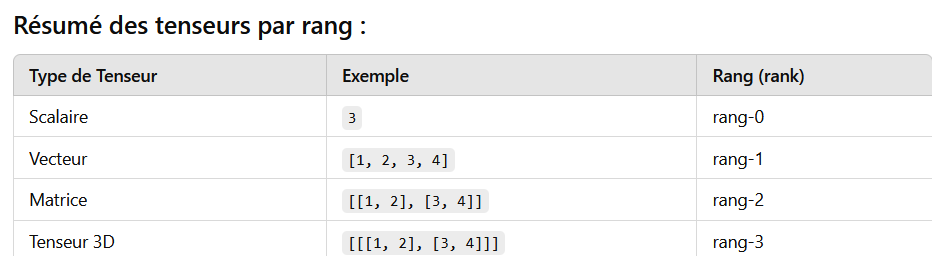

### Reshape

La fonction ***reshape*** est une opération essentielle dans de nombreux frameworks de machine learning, comme NumPy, TensorFlow et PyTorch, qui permet de changer la forme (ou la structure) d'un tenseur tout en conservant ses données. Cela peut être particulièrement utile lorsque vous devez ajuster les dimensions de vos données pour qu'elles correspondent aux exigences d'un modèle ou d'une couche de réseau neuronal.

***Concept de reshape***

Le reshape consiste à restructurer les dimensions d'un tableau ou d'un tenseur sans modifier son contenu. Par exemple, vous pouvez transformer un vecteur en une matrice ou une matrice en un tableau unidimensionnel. Les éléments doivent être conservés dans le même ordre, mais leur agencement dans l'espace des dimensions change.

***Exemple d'UTILISATION***

In [45]:
import numpy as np

# Créer un tableau 1D
array = np.array([1, 2, 3, 4, 5, 6])
array.ndim
array.shape

(6,)

In [46]:
# 1 Redimensionner en une matrice 1*6
reshaped_array = array.reshape(1, 6)
reshaped_array
reshaped_array.shape

(1, 6)

In [47]:
# 2  ajouter une dimention
print(array.shape)
r = np.expand_dims(array, axis=0)
print(r.shape)

(6,)
(1, 6)


In [48]:
reshaped_array.ndim
reshaped_array.shape

(1, 6)

Utilisation de -1 : Il est possible d'utiliser -1 dans l'une des dimensions lorsque vous ne savez pas quelle dimension exacte spécifier. TensorFlow ou NumPy calculera automatiquement la dimension manquante. Par exemple, si vous avez un tableau de taille 6 et que vous voulez le transformer en un tableau 3x?, vous pouvez utiliser -1 pour que la fonction calcule la dimension restante.

Exemple 

In [49]:
# Redimensionner en une matrice 2x3
reshaped_ar = array.reshape(2, -1)
reshaped_ar

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
reshaped_ar.shape

(2, 3)

# ***Division en ensemble d’entraînement et de test***

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pourquoi utiliser train_test_split ?

Dans le machine learning et le deep learning, il est important de séparer les données en plusieurs parties :

    Ensemble d'entraînement (train set) : utilisé pour entraîner le modèle.
    Ensemble de test (test set) : utilisé pour évaluer la performance du modèle sur des données jamais vues.

Cela permet de vérifier si le modèle généralise bien ou s'il fait du surapprentissage (overfitting).

Explication des paramètres

    X : les features (variables d’entrée du modèle).
    y : la variable cible (ce que l’on veut prédire).
    test_size=0.2 : 20% des données seront utilisées pour le test, et 80% pour l'entraînement.
    random_state=42 : permet de garder le même découpage à chaque exécution pour obtenir des résultats reproductibles.
    train_size=0.8 (optionnel) : définit explicitement la proportion des données d’entraînement.
    shuffle=True (par défaut) : mélange les données avant la séparation.
    stratify=y (optionnel) : assure une répartition équilibrée des classes dans les ensembles d'entraînement et de test (utile pour la classification).

# Normalisation des données

Les réseaux de neurones fonctionnent mieux avec des données normalisées :

In [52]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [53]:
X_train[0]

array([ 1.59381791,  1.28770177, -0.50032012,  1.03323679, -0.27808871,
        0.48925206, -1.42806858,  1.02801516, -0.80217296,  1.70689143,
        1.57843444,  0.84534281, -0.07433689,  1.75350503])

# Création du modèle de deep learning

In [54]:
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  
    layers.Dense(32, activation="relu"),  
    layers.Dense(1)   # pour clasification binaire  Activation doit etre sigmoid pour sortie binaire (0 ou 1)
])

C:\Users\FUJITSU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Explication :

    layers.Dense(64, activation='relu') → couche dense avec 64 neurones et fonction d’activation ReLU
    input_shape=(10,) → entrée avec 10 features
    sortie adaptée à régression sans fonction d'activation 


Affichage de modèle

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compilation du modèle

Pour que nous puissions entraîner le modèle, celui-ci doit être compilé, et pour cela, nous devons choisir :

    l'optimiseur (???) 
    la fonction de perte (loss function)  (????)
    les métriques de performance (????)

### ***Pour un problème de régression, la fonction de perte utilisée est souvent l’erreur quadratique moyenne (MSE) :***

In [56]:
from tensorflow.keras.optimizers import Adam
algor = Adam(learning_rate=0.001)

model.compile(optimizer=algor, loss="mse", metrics=["mae"])

mae : 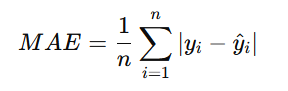

optimizer
1. SGD
   
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

3. Adam (Adaptive Moment Estimation)
 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

4. RMSprop
   
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

5. Adagrad
   
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)

# Entraînement du modèle

On entraîne le modèle avec 100 époques :

In [57]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64)
#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 624.9349 - mae: 23.1566
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 619.8168 - mae: 22.8114 
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 568.3307 - mae: 21.9760
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 533.0869 - mae: 21.1289  
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 521.4876 - mae: 20.8620 


Explication 

***1. Epochs***

Une epoch correspond à un passage complet sur l’ensemble des données d’entraînement par le modèle. Lors de chaque epoch, le modèle traite toutes les données d’entraînement une fois (ou plusieurs fois en fonction du nombre d’epochs défini).

    Un modèle peut nécessiter plusieurs epochs pour apprendre les bonnes relations dans les données.
    Trop peu d’epochs peuvent conduire à un sous-apprentissage (underfitting), et trop d’epochs peuvent causer un surapprentissage (overfitting).batch size

***2. Batch size***

Le batch size (taille du lot) définit le nombre d'échantillons que le modèle traite avant d’ajuster ses poids. Au lieu de passer toutes les données d’un coup (ce qui pourrait être trop lourd en mémoire), les données sont divisées en mini-lots (batches).

    Petit batch (batch size faible, ex: 16, 32) :
        Plus de mises à jour du modèle
        Moins de consommation mémoire
        Peut introduire plus de bruit dans l’optimisation
    Grand batch (ex: 128, 256, 512...) :
        Plus stable mais nécessite plus de mémoire
        Moins de mises à jour



# Évaluation du modèle

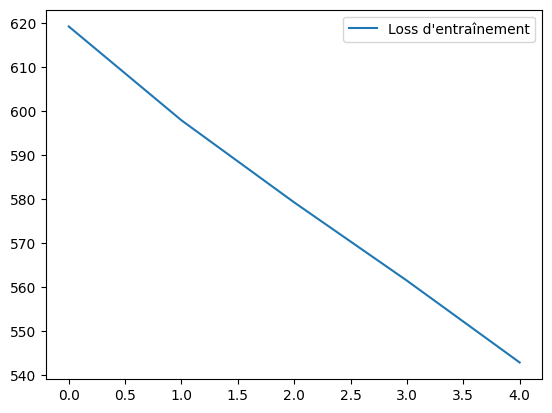

In [58]:
plt.plot(history.history['loss'], label="Loss d'entraînement")  
#plt.plot(history.history['val_loss'], label="Loss de validation")  
plt.legend()  
plt.show() 

# Évaluation sur les données de test

In [59]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Erreur quadratique moyenne (MSE) : {loss}")
print(f"Erreur absolue moyenne (MAE) : {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 456.7791 - mae: 19.6939
Erreur quadratique moyenne (MSE) : 465.1346740722656
Erreur absolue moyenne (MAE) : 19.767250061035156


### utilisation de méthode predict 

In [60]:
# Prédictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


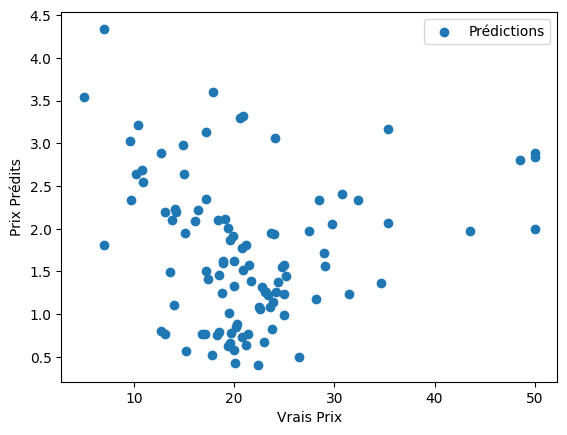

In [61]:

# Visualisation des résultats
plt.scatter(y_test, y_pred, label='Prédictions')
plt.xlabel('Vrais Prix')
plt.ylabel('Prix Prédits')
plt.legend()
plt.show()

Résumé des étapes

    Installation des bibliothèques
    Importation des bibliothèques
    Chargement et exploration des données
    Préparation des données (train-test split et normalisation)
    Création du modèle avec Keras
    Compilation avec adam et mse
    Entraînement du modèle
    Évaluation et visualisation des performances
    Test avec de nouvelles données

## Exercice

1. Modifier l’architecture du réseau (ajouter/supprimer des couches).

2. Changer le nombre d’époques et voir l’impact sur l’apprentissage.

3. Expérimenter avec d’autres fonctions d’activation (sigmoid, relu).

4. Tester d'autres optimisateurs comme SGD ou RMSprop.

5. Expérimenter avec différentes tailles de batchs.